# Portfolio Construction with Underlying Efficient Market Hypothesis Assumptions 

Today's modern financial market has changed in ways that were never shown at this scale over history. Portfolio construction today still takes the traditional approaches to the process. The new world will forever change how people analyze financial markets. I believe that we are in a state of transition where old portfolio managers still take traditional approaches and new managers are changing the landscape in which portfolios are constructed. The efficent market theory states that:
> "The primary role of the capital market is allocation of ownership of the economy's capital stock. In general terms, the ideal is a market in which prices provide accurate signals for resource allocation: that is, a market in which firms can make production-investment decisions, and investors can choose among the securities that represent ownership of firms' activities under the assumption that security prices at any time 'fully reflect' all available information. A market in which prices always "fully reflect" available information is called 'efficient.'" (Fama, 1970) 

### Modern Portfolio Theory 
Markowitz's modern portfolio theory states that securities have either high risk and high return or low risk and low return. He argued that an optimal mix of assets exists based on their individual historical risk and return profiles. Markowitz's stated that diversified portfolios can offer greater returns for the level of risk an investor is willing to take. The effienct frontier is essential for creating client portfolios that will satisfy their risk and return objective. Commonly used by investment advisory firms as well and instituional investment firms. The effiecient frontier offers a overview of the optimal portfolio for any level of risk, that is extremely great place to start for any portfolio contruction.

In [1]:
import pandas as pd
import numpy as np
import pandas_datareader as web
import matplotlib.pyplot as plt
import datetime
#imported a library that I created so that I wouldn't clutter this notebook
from mylib.mean_variance import *
import statsmodels.api as sm
plt.rcParams.update({"font.size":40})
start = datetime.datetime(2011,1,1)
end = datetime.datetime.today()
rf = web.DataReader("^TNX", "yahoo", start = datetime.datetime(2021,10,1), end = end)["Adj Close"]
rf = pd.DataFrame(rf)
ticker_lst = ["MRVL", "IDXX", "MSCI", "LULU", "CMG", "A"]

In [2]:
portfolios = mean_variance(ticker_lst, start = start, end = end)
portfolios

,Returns,Volatility,MRVL Weight,IDXX Weight,MSCI Weight,LULU Weight,CMG Weight,A Weight
0,30.281347,25.930677,0.302102,0.026264,0.115124,0.326975,0.200961,0.028574
1,30.919347,24.029489,0.103168,0.014423,0.286809,0.247499,0.249624,0.098477
2,30.130886,23.825016,0.253682,0.009838,0.234718,0.169501,0.110600,0.221661
3,28.704090,23.569029,0.204436,0.112658,0.040174,0.222136,0.240112,0.180485
4,31.290106,22.006558,0.122229,0.293486,0.206670,0.045651,0.115920,0.216043
...,...,...,...,...,...,...,...,...
19995,30.177358,23.500921,0.187095,0.163981,0.095170,0.215223,0.272373,0.066159
19996,31.688415,24.244412,0.011022,0.346313,0.108777,0.354862,0.076884,0.102142
19997,30.382422,24.914780,0.189757,0.044491,0.195272,0.330138,0.037322,0.203020
19998,33.106543,23.790415,0.195823,0.271130,0.219318,0.256445,0.028864,0.028420


#### Efficient Frontier
Plotted is the efficient frontier. By taking the historical price change data from each individual stock you are able to create an yearly return profile of each stock and then multiply that by each portfolio's weight to find the yearly expected return of that portfolio. The risk profile is created by: 
> cov = pct_change_data.cov()
  
> var = cov.mul(weights,axis = 0).mul(weights,axis=1).sum().sum()
  
> sd = np.sqrt(var)
  
> ann_sd = sd*np.sqrt(252)

That gives you the annual standard deviation of each stocks return by the weight of the stock in the portfolio to calculate the volatility. 

Plotting that shows each portfolio and as you can see there is a clear curvature that shows the optimal portfolio for each level of risk. The bottom left of the plot would be considered a conservative investing approach, the middle area would be considered a moderate investing approach, and the top right area of the plot would be considered an aggressive investing approach. Portfolios that are considered sub optimal would not be considered for an investment strategy. 

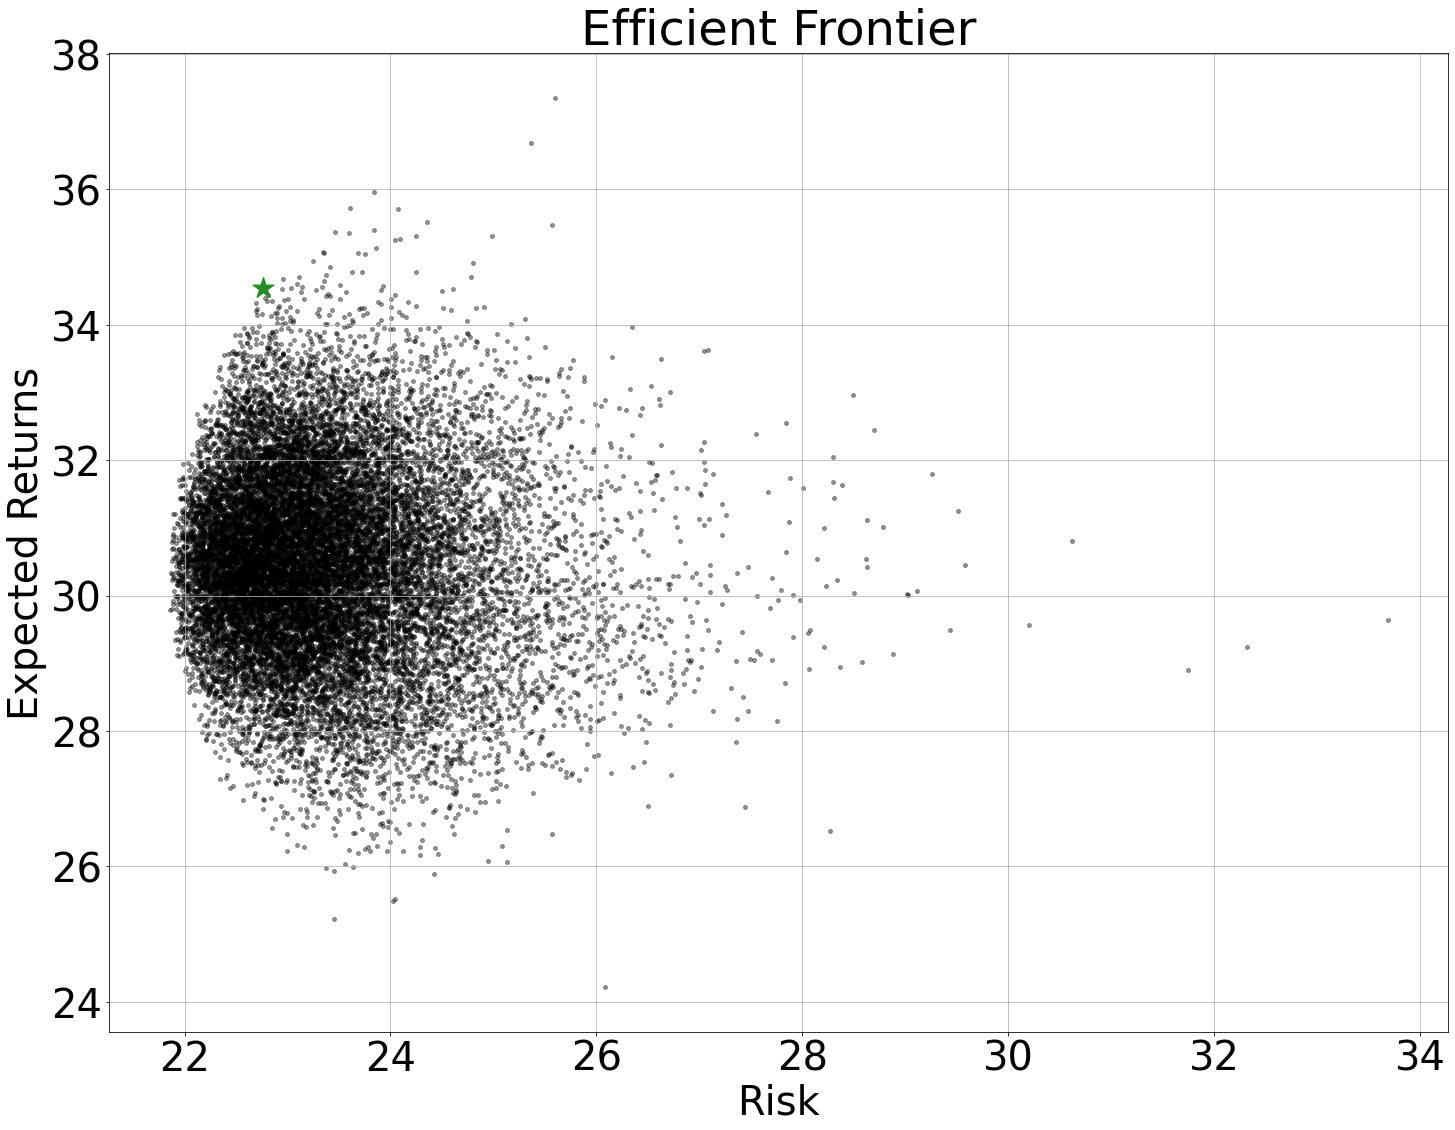

In [3]:
efficient_frontier(portfolios, alpha = .4)
#the * is the optimal mean variance portfolio

#### Sharpe Ratio
Below shows the highest optimal portfolio on the efficient frontier. This portfolio has the highest sharpe ratio: 
> (Portfolio Return - Risk Free Return)/Volatility

The sharpe ratio uses the portfolio returns and volatility and the risk-free rate to find how your returns compare to the level of risk. This is a very important portfolio performance tool that is widely used to explain to investors how their portfolio is aligned with their goals. Not every portfolio needs to the portfolio with the optimal sharpe ratio, instead it more corresponds with the level of risk you want to take and what returns you can expect for that. Particluarly for individual wealth managers this can assess where a client best fits with thier desired goals. 

Portfolio construction around this measure alone can help a top-down strategy as long as the manager has a understanding of capital markets and has a investable universe of stocks or ETFs. This measure is a start of portfolio construction. 

In [4]:
optimal_portfolio = optimal_portfolio(portfolios, rf = rf["Adj Close"][-1])
optimal_portfolio

,Returns,Volatility,MRVL Weight,IDXX Weight,MSCI Weight,LULU Weight,CMG Weight,A Weight
15949,34.541227,22.764384,0.067497,0.350129,0.372113,0.084269,0.105525,0.020467


#### Market Beta

In [5]:
# market return
data_dct = {}
for ticker in ticker_lst:
    data_dct[ticker] = web.DataReader(ticker, 
                                      "yahoo", 
                                      start = start, 
                                      end = end)["Adj Close"]
data_dct["Market"] = web.DataReader("^GSPC",  
                                    "yahoo", 
                                    start = start, 
                                    end = end)["Adj Close"]
market_df = pd.DataFrame(data_dct)
market_df

,MRVL,IDXX,MSCI,LULU,CMG,A,Market
Date,,,,,,,
2011-01-03,16.061514,34.875000,36.435436,35.790001,223.630005,27.378340,1271.869995
2011-01-04,15.697659,34.439999,35.835098,33.599998,222.369995,27.123375,1270.199951
2011-01-05,16.078844,34.549999,36.315361,34.244999,221.000000,27.064547,1276.560059
2011-01-06,16.945148,34.500000,36.038303,33.494999,226.500000,27.116846,1273.849976
2011-01-07,17.360989,34.240002,35.798149,33.500000,224.259995,27.208372,1271.500000
...,...,...,...,...,...,...,...
2021-10-26,67.730003,651.960022,643.119995,432.730011,1748.479980,158.190002,4574.790039
2021-10-27,67.699997,640.500000,637.000000,433.700012,1766.060059,155.259995,4551.680176
2021-10-28,68.480003,653.020020,655.330017,443.459991,1777.630005,155.759995,4596.419922


In [6]:
pct_change_dct={}
for key in market_df: 
    pct_change_dct[key + " Change"] = market_df[key].pct_change()
pct_change_df = pd.DataFrame(pct_change_dct).dropna()
pct_change_df

,MRVL Change,IDXX Change,MSCI Change,LULU Change,CMG Change,A Change,Market Change
Date,,,,,,,
2011-01-04,-0.022654,-0.012473,-0.016477,-0.061190,-0.005634,-0.009313,-0.001313
2011-01-05,0.024283,0.003194,0.013402,0.019196,-0.006161,-0.002169,0.005007
2011-01-06,0.053879,-0.001447,-0.007629,-0.021901,0.024887,0.001932,-0.002123
2011-01-07,0.024540,-0.007536,-0.006664,0.000149,-0.009890,0.003375,-0.001845
2011-01-10,0.011976,0.000292,-0.003096,0.020896,-0.002631,0.014416,-0.001376
...,...,...,...,...,...,...,...
2021-10-26,0.000887,-0.000858,-0.013665,0.011193,-0.014930,-0.000947,0.001820
2021-10-27,-0.000443,-0.017578,-0.009516,0.002242,0.010054,-0.018522,-0.005052
2021-10-28,0.011522,0.019547,0.028776,0.022504,0.006551,0.003220,0.009829


In [7]:
beta = {}
for key in pct_change_df:
    Y = pct_change_df[key]
    X = pct_change_df["Market Change"]
    model = sm.OLS(Y,X)
    results = model.fit()
    beta[key+" Beta"] = results.params
beta = pd.DataFrame(beta)
beta

,MRVL Change Beta,IDXX Change Beta,MSCI Change Beta,LULU Change Beta,CMG Change Beta,A Change Beta,Market Change Beta
Market Change,1.207778,0.946193,1.159759,1.099677,0.840036,1.191893,1.0


### Multifractor Asset Pricing

In [9]:
import hurst

### Financial Democratization
Democratizing finance is one area where this hypothesis is tested. Increased "gambling" in financial markets by retail traders. Capital stock is allocated with perfect correlation with all available financial decision making data available. As we have seen with Gamestop (GME) and AMC Theatres (AMC), where capital was allocated by retail "gamblers" and effectively disrupted the efficiect flow of capital to those failing and declining industries. In Bing Han and Alok Kumar's article, in the Journal of Financial and Quantitative Analysis, "Speculative Retail Trading and Asset Prices" they state that: 
> "We find that stocks with high retail trading proportion (RTP) have strong lottery features and they attract retail investors with strong gambling propensity. Furthermore, these stocks tend to be overpriced and earn significantly negative alpha. The average monthly return differential between the extreme RTP quintiles is -0.60%. This negative RTP premium is stronger among stocks that have lottery features or are located in regions where people exhibit stronger gambling propensity. Collectively, these results indicate that speculative retail trading affects stock prices."

This strenthens my case that capital is increasing be allocated inefficiently by retail investors and that this should be factored into the mindset of managers during portfolio construction. 

Increased informativeness amongst these retail traders also plays a crucial role in the behavioral bias in the market. Information sharing of retail traders through social media can create a clouded retail bias. Decisions that would require further analysis by invdividuals to create a efficient decision process for an efficient market are thrown out by a group think mentality such as "we like the stock" or the Elon Musk "cult". However, I can make the claim that though information sharing sites enable group think, it also gives retail traders the opportuntity to become better informed and make better capital alllocation decisions, with only a minority falling into group think. 

Another point to make with increased retail trade volume is the fact that with increased volume allows for increased market liquidity, a important factor when making capital allocation decisions. Menachem Meni Abudy states in his article "Retail investors’ trading and stock market liquidity": 
> "The findings show a positive and significant relation between retail investors’ trading and stock market liquidity. Examination of the determinants of retail investors’ trading reveals that, on average, retail investors with more diversified trading activity tend to trade when liquidity is higher, the frequency of their arrival to the market is not affected by the level of liquidity, and retail investors are willing to trade at a lower liquidity level as sellers than as buyers. Moreover, retail investors’ trading does not create price noise at the aggregate market level. Overall, the evidence suggests that retail investors contribute to market quality."

His paper studies the behavior between between retail traders participation and the overall stock market liquidity. 